In [1]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 12290.212890625
199 4020.43359375
299 1003.636962890625
399 231.23928833007812
499 136.229736328125
599 120.8916015625
699 102.63507080078125
799 79.78594970703125
899 55.377620697021484
999 34.04414367675781
1099 19.302181243896484
1199 11.722176551818848
1299 9.222915649414062
1399 8.834193229675293
1499 8.817298889160156
1599 9.29518985748291
1699 8.858123779296875
1799 8.938533782958984
1899 8.983480453491211
1999 8.900053977966309
Result: y = 6.804727945564082e-07 + 0.857205331325531 x + 6.892014425829984e-07 x^2 + -0.09286399185657501 x^3


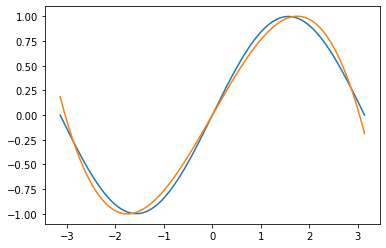

In [3]:
import matplotlib.pyplot as plt
plt.plot(x.cpu().numpy(), y.cpu().numpy())
plt.plot(x.cpu().numpy(), (linear_layer.bias.item() + linear_layer.weight[:, 0].item()*x+linear_layer.weight[:, 1].item()*x**2+linear_layer.weight[:, 2].item()*x**3).cpu().numpy())
plt.show()